# Pandas

In [1]:
import numpy as np
import pandas as pd

## Creat Data Frame

In [2]:
data={'Name':['S1','S2','S3'],
      'Age' :[25,28,22],
      'Score':np.array([95,80,75])}

df = pd.DataFrame(data)
print(df)

  Name  Age  Score
0   S1   25     95
1   S2   28     80
2   S3   22     75


In [3]:
# add row names
df = pd.DataFrame(data,index=['row1','row2','row3'])
print(df)

     Name  Age  Score
row1   S1   25     95
row2   S2   28     80
row3   S3   22     75


In [4]:
# List data
data2=[['S1',25,95],
       ['S2',28,80],
       ['S3',22,75]]
df=pd.DataFrame(data2,
                index=['row1','row2','row3'],
                columns=['Name','Age','Score'])
df

,Name,Age,Score
row1,S1,25,95
row2,S2,28,80
row3,S3,22,75


## Subset Observation

In [5]:
# 데이터 프레임 안에 있는 자료 불러오기(가져오기)
# columns observation, columns(세로줄) 뽑아오기
#df[['Name','Score']]
#df['Name']
#df['Score']

# row observation, index(가로줄) 뽑아오기
#df.loc[['row1','row3']]

#row and columns observation, index와 columns의 교차되는 값을 가져오기
#df.loc['row1','Name']

# columns(세로줄)을 다 확인하고 싶을때 가져오는 방법
#df.loc[:, 'Name']


#df.loc[:,['Name','Score']]

df.loc[:, 'Name':'Score'] # 시작하는 columns 과 끝 columns사이의 모든 columns 을 가져옴

,Name,Age,Score
row1,S1,25,95
row2,S2,28,80
row3,S3,22,75


In [6]:
# indexing/slicing

# 4:49:20 강의 
df.iloc[0,0]
df.iloc[:,[0,2]]
df.iloc[::2,[0,2]] # index와 columns 방향으로 원하는 자료의 모든 시작점과 끝점을 두번 건너뛰고 columns에서는 index[0]과 index[2] 에서 불러오라는 의미

,Name,Score
row1,S1,95
row3,S3,75


In [7]:
df.iloc[-1::-1,:] # 마지막 index 부터 자료를 불러오기 시작하면서 하나씩 역순으로 자료를 불러오고 모든 columns을 불러오는 의미


,Name,Age,Score
row3,S3,22,75
row2,S2,28,80
row1,S1,25,95


## Summarizing Data

In [8]:
df2=df.copy()

df2.loc['row2','Score']=np.NaN # df2 의 row2 index의 Score columns의 값을 NaN 처리 하는 코드
df2

,Name,Age,Score
row1,S1,25,95.0
row2,S2,28,NaN
row3,S3,22,75.0


In [9]:
df2.nunique() # 유니크한 value가 몇개가 들어 있는지 확인해주는 함수 nunique

Name     3
Age      3
Score    2
dtype: int64

In [10]:
df2['Age'].nunique() # 해당 변수의 유니크한 함수를 뽑아오는 코드

3

In [11]:
df2['Score'].value_counts() # 'Score'에서 정수에 해당하는게 몇개가 있는지 알려줌

95.0    1
75.0    1
Name: Score, dtype: int64

In [12]:
df3=df2.copy()
df3.loc['row','Score']=df3.loc['row1','Score']
print(df3)
df3['Score'].value_counts()

     Name   Age  Score
row1   S1  25.0   95.0
row2   S2  28.0    NaN
row3   S3  22.0   75.0
row   NaN   NaN   95.0


95.0    2
75.0    1
Name: Score, dtype: int64

In [13]:
df3['Score'].count() # count : 데이터가 몇개가 들어있는지 확인시켜주는 함수
df.max()
df['Score'].std()

10.408329997330664

## Columns Exchange - 칼럼 순서 변경

In [14]:
df4=df.copy()
df4=df4.iloc[:,[0,2,1]]
print(df) # 변경되기 전의 df dataframe
print(df4) # 변경한 후의 df dataframe

45517

     Name  Age  Score
row1   S1   25     95
row2   S2   28     80
row3   S3   22     75
     Name  Score  Age
row1   S1     95   25
row2   S2     80   28
row3   S3     75   22


45517

## Pandas Logical Operation

In [15]:
data = {
        'Class' :['A','B','C','A','B','C','C'],
        'Name'  :['S1','S2','S3','S4','S5','S6','S7'],
        'Age'   :[20,19,21,22,24,25,26],
        'Score' :[90.,95.,75.,80,70,85,90],
    }
df= pd.DataFrame(data)
df

,Class,Name,Age,Score
0,A,S1,20,90.0
1,B,S2,19,95.0
2,C,S3,21,75.0
3,A,S4,22,80.0
4,B,S5,24,70.0
5,C,S6,25,85.0
6,C,S7,26,90.0


In [16]:
# Score가 80점 이상인 데이터만 추출하기 위해 80점 이상인 데이터들을 확인
df['Score']>=80

0     True
1     True
2    False
3     True
4    False
5     True
6     True
Name: Score, dtype: bool

In [17]:
# Score가 80점 이상인 데이터 추출
df.loc[df['Score']>=80]

,Class,Name,Age,Score
0,A,S1,20,90.0
1,B,S2,19,95.0
3,A,S4,22,80.0
5,C,S6,25,85.0
6,C,S7,26,90.0


In [18]:
# Score가 80점 이상인 데이터와 Name을 같이 추출
df.loc[df['Score']>=80,'Name']

0    S1
1    S2
3    S4
5    S6
6    S7
Name: Name, dtype: object

In [19]:
# Score가 80점 이상인 이름(Name)과 나이(Age) 추출
df.loc[df['Score']>=80,['Name','Age']]

,Name,Age
0,S1,20
1,S2,19
3,S4,22
5,S6,25
6,S7,26


In [20]:
# 80점을 넘지 못할 경우 'Fale'이라는 값을 넣을 컬럼 추가
df['Result']='NONE'
df.loc[df['Score']>=80, 'Result']='Pass' # 80점 이상인 학생은 Result에 Pass 표시
df.loc[df['Score']<80,'Result']='Fail' # 80점 이하인 학생은 Result에 Fale 표시
df

,Class,Name,Age,Score,Result
0,A,S1,20,90.0,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,75.0,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [21]:
idx=df['Result']=='Pass' # Result 에서 Pass와 일치하는지 확인하고 'idx' 라는 조건변수에 저장
df.loc[idx] # 위에서 만든 조건변수 idx 조건의 컬럼을 추출

,Class,Name,Age,Score,Result
0,A,S1,20,90.0,Pass
1,B,S2,19,95.0,Pass
3,A,S4,22,80.0,Pass
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [22]:
df.loc[idx].sort_values('Score') # sort_values 로 'Score' 컬럼을 기준으로 정렬(오름차순)

,Class,Name,Age,Score,Result
3,A,S4,22,80.0,Pass
5,C,S6,25,85.0,Pass
0,A,S1,20,90.0,Pass
6,C,S7,26,90.0,Pass
1,B,S2,19,95.0,Pass


In [23]:
df_sorted=df.loc[idx].sort_values('Score', ascending=False) # ascending=False로 내림차순 정렬
df_sorted

,Class,Name,Age,Score,Result
1,B,S2,19,95.0,Pass
0,A,S1,20,90.0,Pass
6,C,S7,26,90.0,Pass
5,C,S6,25,85.0,Pass
3,A,S4,22,80.0,Pass


In [24]:
#df_sorted.to_excel('data_sorted.xlsx',index=False) # 'df_sorted 라는 dataframe을 'data_sorted'의 엑셀파일로 저장하는데 index=False를 하지 않으면 불러올때 
                                                    # index열이 새로 추가되서 저장된 상태로 불러와진다. 그래서 index=False를 한 상태에서 저장하는게 좋다.
#df_sorted.to_csv('data_sorted.csv') # csv로 저장

In [25]:
#df_import = pd.read_excel('data_sorted.xlsx') # data_sorted 라는 엑셀파일을 df_import의 이름으로 불러오기
#df_csv=pd.read_csv('data_sorted.csv')  # data_sorted.csv 라는 csv 파일을 df_csv 이름으로 불러오기

## Pandas Grouping

In [26]:
df

,Class,Name,Age,Score,Result
0,A,S1,20,90.0,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,75.0,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [27]:
df.groupby(by='Class').mean() # df의 Class 그룹을 기준으로 평균을 추출

C:\Users\LG\AppData\Local\Temp\ipykernel_3648\598670419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Class').mean() # df의 Class 그룹을 기준으로 평균을 추출


,Age,Score
Class,,
A,21.0,85.000000
B,21.5,82.500000
C,24.0,83.333333


In [28]:
df.groupby(by='Class').count() # df의 Class 그룹을 기준으로 카운팅

,Name,Age,Score,Result
Class,,,,
A,2,2,2,2
B,2,2,2,2
C,3,3,3,3


## Pandas Plotting

<Axes: xlabel='Name'>

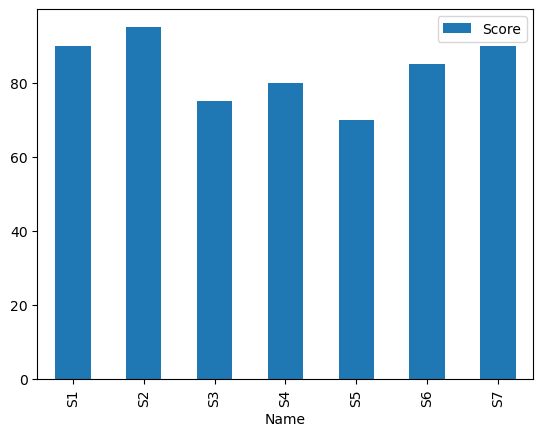

In [29]:
df.plot.bar('Name','Score') # y축엔 'Name'을 넣고 x축엔 'Score'를 넣은 bar plot을 그림

<Axes: xlabel='Name'>

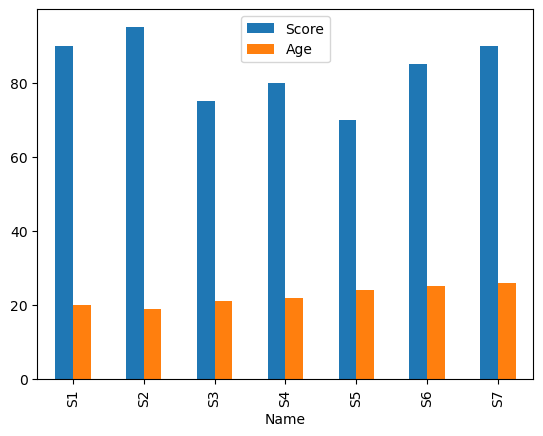

In [30]:
df.plot.bar('Name',['Score','Age'])

## Handling Missing Data

In [31]:
df.loc[[0,2],'Score']=np.NaN # 'df' index의 0과 2를 선택하고 columns은 'Score'를 선택하여 NaN으로 변경하는 코드
df

,Class,Name,Age,Score,Result
0,A,S1,20,NaN,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,NaN,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [32]:
df.isnull() # NaN 이 들어가 있는 위치를 True, False로 표시해줌. NaN일 경우 <True 표시>

,Class,Name,Age,Score,Result
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [33]:
df.dropna() # NaN이 들어가 있는 index를 드랍하여 데이터가 있는 곳만 dataframe을 띄워줌

,Class,Name,Age,Score,Result
1,B,S2,19,95.0,Pass
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [34]:
value=0
df.fillna(value) # fillna() : dropna() 처럼 NaN이 들어있는 index전체를 버리지 않고 위의 value=0 으로 치환한 후 데이터를 표시

,Class,Name,Age,Score,Result
0,A,S1,20,0.0,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,0.0,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [35]:
# replace
df.replace(np.nan,-1) # NaN(np.nan)을 -1로 치환

,Class,Name,Age,Score,Result
0,A,S1,20,-1.0,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,-1.0,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


In [36]:
# interpolate
df.interpolate() # NaN으로 되어있는 데이터를 위, 아랫값의 평균으로 치환, 첫번째 index가 NaN일 경우에는 위의 데이터가 존재하지 않으므로 그대로 NaN 처리 된다.

,Class,Name,Age,Score,Result
0,A,S1,20,NaN,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,87.5,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass


## Pandas Applying Function to DataFrame

In [37]:
# Function
def add_one(x): # add_one 이라는 x에 들어오는 변수에 1을 더해서 출력하는 새로운 함수를 생성.
    return x+1

In [38]:
# df 에 add_one(x) 를 적용
df['Age'].apply(add_one) # df 의 'Age' 데이터에 1씩 추가됨.

0    21
1    20
2    22
3    23
4    25
5    26
6    27
Name: Age, dtype: int64

In [39]:
df['Score'].apply(np.square) # df의 'Score'데이터에 제곱을 해줌

0       NaN
1    9025.0
2       NaN
3    6400.0
4    4900.0
5    7225.0
6    8100.0
Name: Score, dtype: float64

## Pandas Using Regular Expressions

In [41]:
# Regular Expressions : 정규표현식
df.filter(regex='[NR]') # 'N'과 'R'이 들어가 있는 칼럼을 필터링 해서 추출해달라는 의미

,Name,Result
0,S1,Pass
1,S2,Pass
2,S3,Fail
3,S4,Pass
4,S5,Fail
5,S6,Pass
6,S7,Pass


In [43]:
df.filter(regex='[NSR]')

,Name,Score,Result
0,S1,NaN,Pass
1,S2,95.0,Pass
2,S3,NaN,Fail
3,S4,80.0,Pass
4,S5,70.0,Fail
5,S6,85.0,Pass
6,S7,90.0,Pass


In [45]:
# DataFrame 합치기
df_vertical=pd.concat([df,df])
df_vertical

,Class,Name,Age,Score,Result
0,A,S1,20,NaN,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,NaN,Fail
3,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass
0,A,S1,20,NaN,Pass
1,B,S2,19,95.0,Pass
2,C,S3,21,NaN,Fail


In [58]:
# 가로 방향으로 Dataframe 연결 'axis=1'
df_horizontal=pd.concat([df,df],axis=1)
df_horizontal

,Class,Name,Age,Score,Result,Class,Name,Age,Score,Result
0,A,S1,20,NaN,Pass,A,S1,20,NaN,Pass
1,B,S2,19,95.0,Pass,B,S2,19,95.0,Pass
2,C,S3,21,NaN,Fail,C,S3,21,NaN,Fail
3,A,S4,22,80.0,Pass,A,S4,22,80.0,Pass
4,B,S5,24,70.0,Fail,B,S5,24,70.0,Fail
5,C,S6,25,85.0,Pass,C,S6,25,85.0,Pass
6,C,S7,26,90.0,Pass,C,S7,26,90.0,Pass


In [54]:
# 파일 원하는 형식으로 저장하기
#df.to_excel('data_excel.xlsx', index=False)
#df.to_csv('data_csv.csv', index=False)
#df.to_csv('data_text.txt', sep='\t', index=False) # sep : 텍스트를 어떻게 나눌 것인지 설정 '\t' -> tab으로 나누는 의미 # Dataframe을 Text로 내보내기
#df.to_pickle('data_pickle.pkl') # Dataframe을 pickle로 내보내기, / Pickle은 대용량 파일을 압축할 때 많이 사용

In [ ]:
# 파일 불러오기
#df_read_excel=pd.read_excel('data_excel.xlsx') # excel 파일 불러오기
#df_read_text=pd.read_csv('data_text.txt', delimiter='\t')  # delimiter : 불러오려는 text 파일이 어떻게 나누어져 있는지 확인시키는 것. # text파일 불러오기
#df_read_csv=pd.read_csv('data_csv.csv') # csv 불러오기
#df_read_pickle=pd.read_pickle('data_pickle.pkl') # Pickle 불러오기